<a href="https://colab.research.google.com/github/hatchdavid1/sports_data/blob/main/coach_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib as cm 
import folium 
from folium.plugins import MarkerCluster
import imageio
import pathlib
from geopy.geocoders import Nominatim
!pip install pycountry_convert
import pycountry_convert as pc

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']


In [4]:
coaches = pd.read_csv('./all_coaches.csv')

In [5]:
# Dropping appointment_date and contract_until_date as not usefull
coaches.drop(columns = ['appointment_date', 'contract_until_date'], inplace = True)
coaches.dropna(inplace = True)
coaches.drop_duplicates(keep= 'first', inplace = True)
coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    97 non-null     object
 1   club                    97 non-null     object
 2   birth_date              97 non-null     object
 3   age                     97 non-null     int64 
 4   place_of_birth          97 non-null     object
 5   citizenship             97 non-null     object
 6   coaching_licence        97 non-null     object
 7   avg_term_as_coach       97 non-null     object
 8   preffered_formation     97 non-null     object
 9   current_league          97 non-null     object
 10  current_league_country  97 non-null     object
dtypes: int64(1), object(10)
memory usage: 9.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

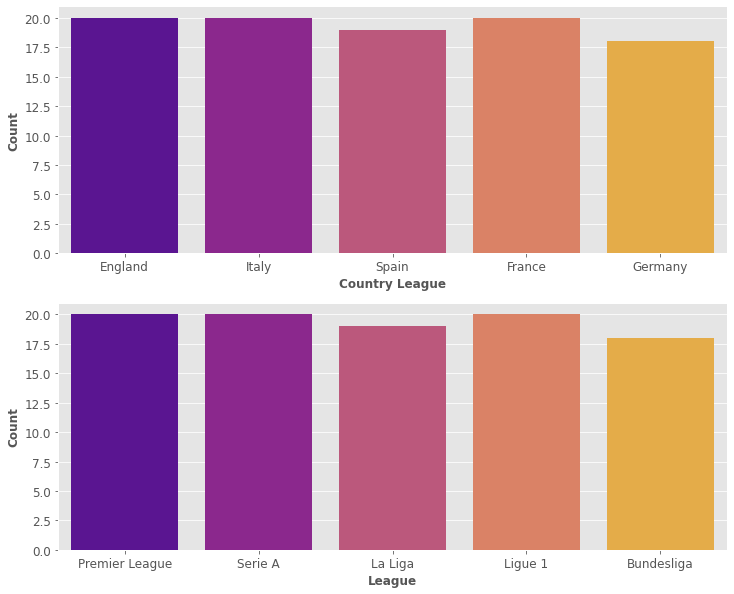

In [6]:
plt.subplot(2,1,1)
sns.countplot(coaches['current_league_country'], palette = 'plasma')
plt.xlabel('Country League')
plt.ylabel('Count')
plt.subplot(2,1,2)
sns.countplot(coaches['current_league'], palette = 'plasma')
plt.xlabel('League')
plt.ylabel('Count')

In [9]:
geolocator = Nominatim(user_agent = 'P')
cities = coaches['place_of_birth']
coaches_map = folium.Map()
geolocator = Nominatim(user_agent= 'Piero')
marker_cluster = MarkerCluster().add_to(coaches_map)

In [17]:
for i in cities.index.tolist():
  location = geolocator.geocode(cities.loc[i])#+','+coaches['citizenship'].loc[i])
  lat,long = location.raw['lat'], location.raw['lon']
  #print('City Location = %s (numer %i) found'%(cities.iloc[i], i))
  radius = 5
  folium.CircleMarker(location = [lat, long], radius = radius, fill = True, popup=coaches['name'][i]).add_to(marker_cluster)
coaches_map